# Edge Detection Using Traditional Methods
In this notebook, we will explore traditional edge detection techniques like **Canny** and **Sobel** using OpenCV. These methods are widely used in image processing to detect boundaries of objects within an image.

In [7]:
#Importing the neccesary libaries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random 


print(f"OpenCV Version: {cv2.__version__}")

OpenCV Version: 4.11.0


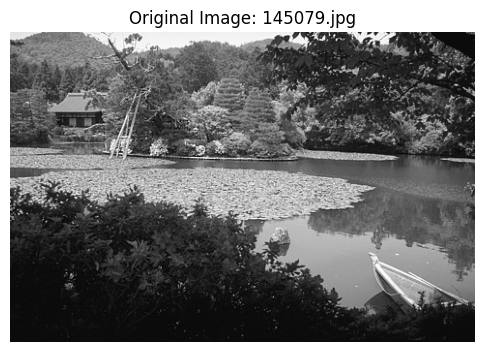

In [8]:
# Loading/Displaying an Image
# We will load in GrayScale to simplify edge detection


image_dir = r"C:\Users\aadit\Edge-Detection-ML\BSR\BSDS500\data\images\test"

# Get a list of image filenames in the directory
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if not image_files:
    raise ValueError("Error: No image files found in the specified directory.")

# Selecting a random image from the list
random_image_file = random.choice(image_files)
image_path = os.path.join(image_dir, random_image_file)

# Loading Image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("Error: Image not found. Check the file path!")

plt.figure(figsize=(6, 6))
plt.imshow(image, cmap="gray")
plt.title(f"Original Image: {random_image_file}")
plt.axis("off")
plt.show()



## Canny Edge Detection

Canny is a multi-stage edge detection algorithm. It uses:
1. **Gaussian Blur** to reduce noise.
2. **Gradient Detection** using Sobel filters.
3. **Non-maximum suppression** to thin edges.
4. **Hysteresis thresholding** to detect edges.

We apply Canny with `threshold1=100` and `threshold2=200`.


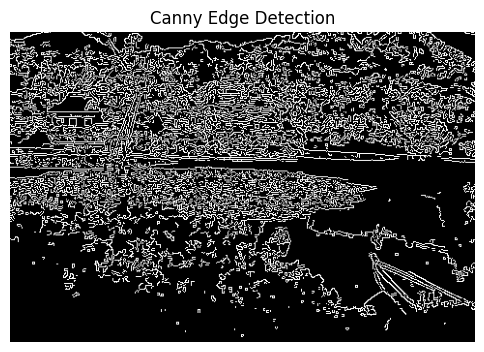

In [9]:
#Canny Edge Detection
#Applying Canny Edge Detection
edges_canny = cv2.Canny(image, 100, 200)

# Displaying results
plt.figure(figsize=(6, 6))
plt.imshow(edges_canny, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()


## Sobel Edge Detection

Sobel filters detect changes in pixel intensity in:
- **X-direction (horizontal edges)**
- **Y-direction (vertical edges)**

We combine both to get the full edge map.


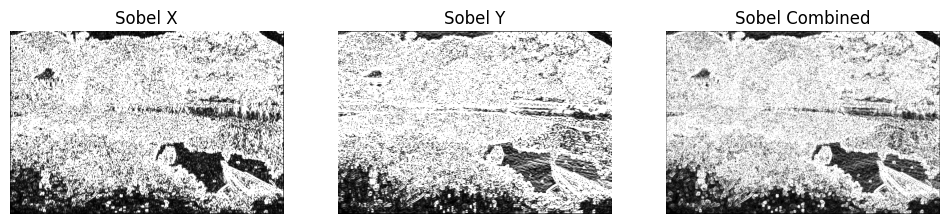

In [10]:
#Sobel Edge Detection
# Apply Sobel Filter in X and Y direction
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # X-direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Y-direction

# Convert results to absolute scale (uint8)
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# Combine X and Y gradients
sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
axes[0].imshow(sobel_x, cmap="gray")
axes[0].set_title("Sobel X")
axes[0].axis("off")

axes[1].imshow(sobel_y, cmap="gray")
axes[1].set_title("Sobel Y")
axes[1].axis("off")

axes[2].imshow(sobel_combined, cmap="gray")
axes[2].set_title("Sobel Combined")
axes[2].axis("off")

plt.show()


## Comparison of Edge Detection Methods

Below is a side-by-side comparison of:
- **Original Image**
- **Canny Edge Detection**
- **Sobel Combined Detection**


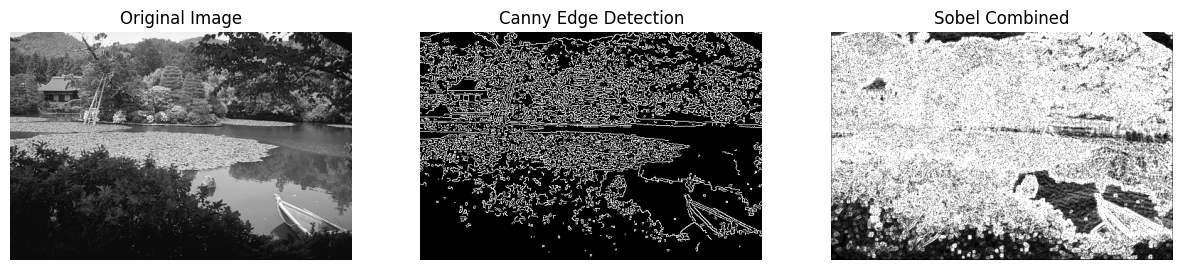

In [11]:
# Display side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(edges_canny, cmap="gray")
axes[1].set_title("Canny Edge Detection")
axes[1].axis("off")

axes[2].imshow(sobel_combined, cmap="gray")
axes[2].set_title("Sobel Combined")
axes[2].axis("off")

plt.show()
